### Introduction: Understanding King_County Housing

In the bustling city of Boston, the dynamics of the housing market play a pivotal role in shaping community development, economic prosperity, and social equity. As urbanization continues to reshape neighborhoods and demand for housing fluctuates, stakeholders across real estate investment, urban planning, and public policy face significant challenges in navigating these complexities.

This project endeavors to provide a comprehensive analysis of Boston's housing market, focusing on key factors that influence housing prices and affordability. By leveraging data-driven approaches, we aim to uncover insights that will empower stakeholders to make informed decisions and promote inclusive growth across diverse neighborhoods.

### Problem Statement:

#### Understanding Housing Market Dynamics in Boston

**Background:**
In Boston, stakeholders in real estate investment, urban planning, and policy-making require a comprehensive understanding of factors influencing housing prices. The aim is to provide insights that support informed decision-making and promote equitable housing solutions across neighborhoods.

### Objectives:

1. **Explore the Relationship Between Property Size and Housing Prices:**
   - Investigate how the average number of rooms (`RM`) in dwellings correlates with median home values (`MEDV`). Determine if larger properties command higher prices, aiding real estate investors in valuation strategies.

## Imports

In [2]:
#imports 
import pandas as pd
import numpy as np

In [3]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Data loading

In [4]:
df = pd.read_csv ("../data/kc_house_data.csv")
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# EDA And Data Cleaning

Get the shape of our dataframe

In [6]:
df.shape

(21597, 21)

- **Number of Rows (Observations):** There are 21597 rows in the DataFrame.
- **Number of Columns (Variables):** There are 21 columns (or variables) in the DataFrame.

data info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

data description of Numerical columns

In [8]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

looking for null values 

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the King_County Housing dataset:

    waterfront, view, yr_renovated: 2376, 63 and 3842 are missing values respectively.
    The other columns have No missing values.

In [10]:
# Identify numeric columns for imputation (excluding 'date')
numeric_cols = df.select_dtypes(include=np.number).columns

In [11]:
# Fill missing values with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [12]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values were found 

## Pair plot

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


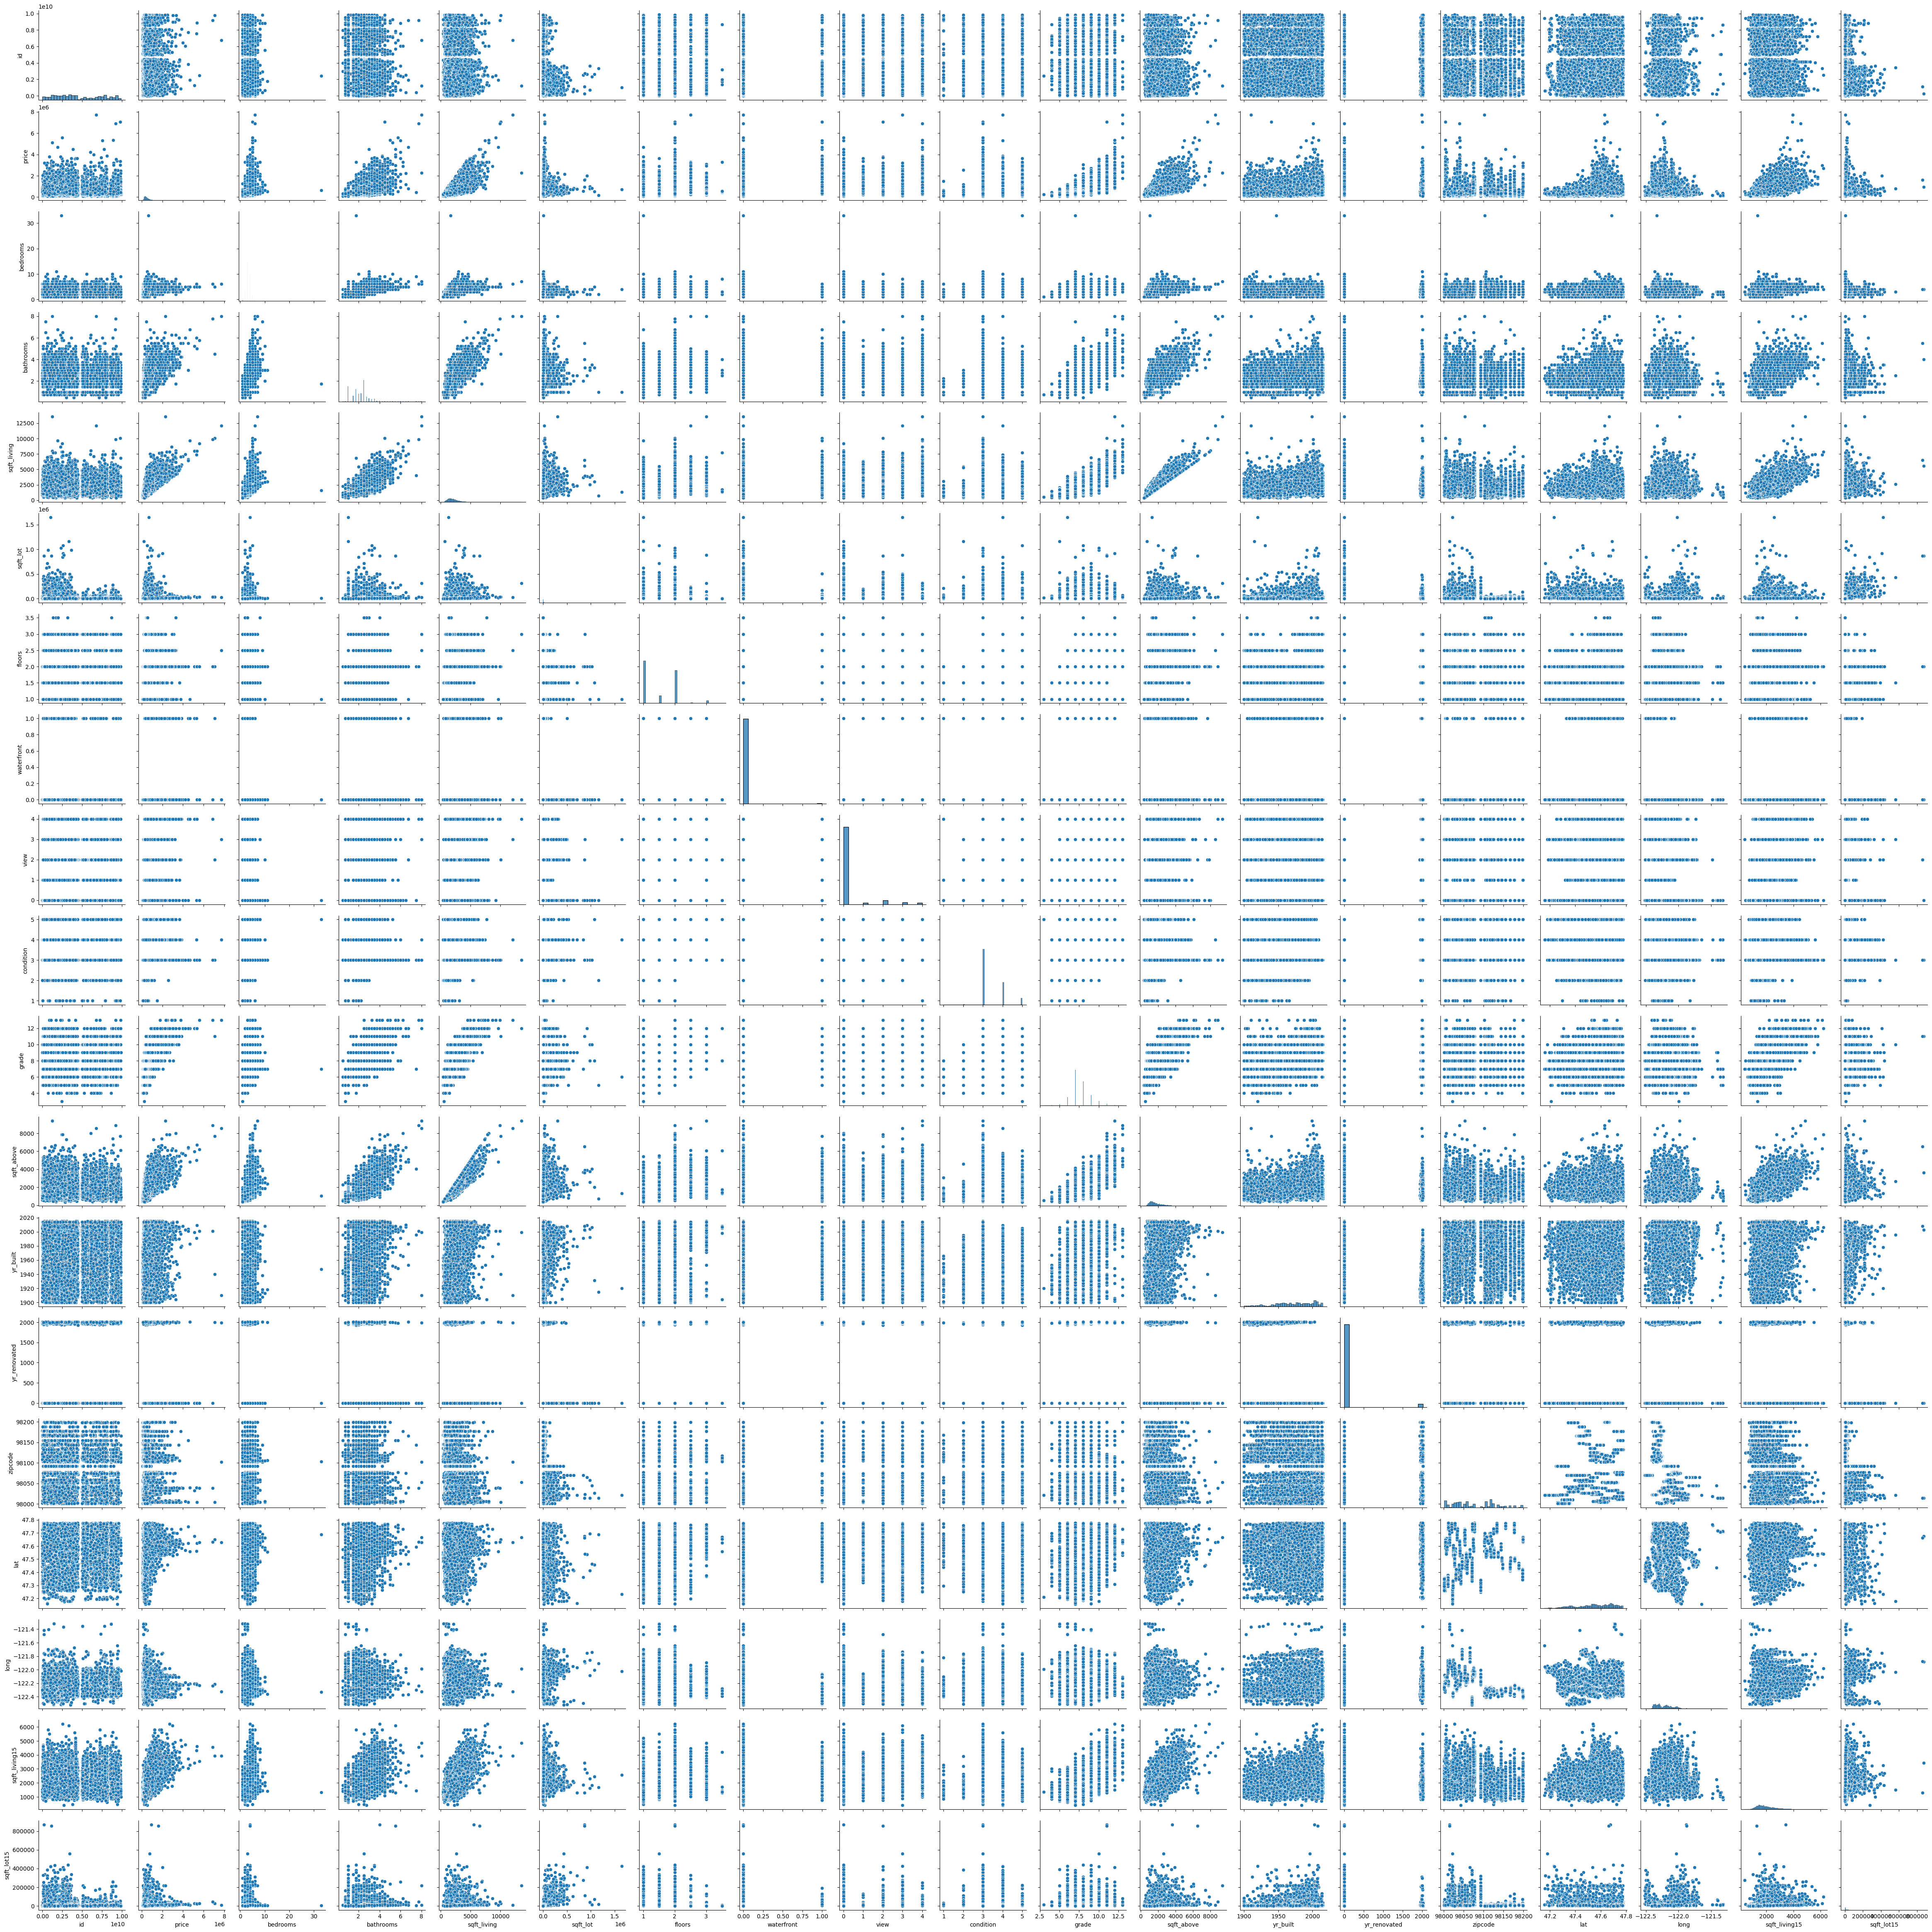

In [13]:
sns.pairplot(data=df)

## Correlation HeatMap

In [14]:
# Drop non-numeric columns if needed, or select numeric columns explicitly
numeric_cols = df.select_dtypes(include=np.number).columns

In [15]:
# Fill missing values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [16]:
# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

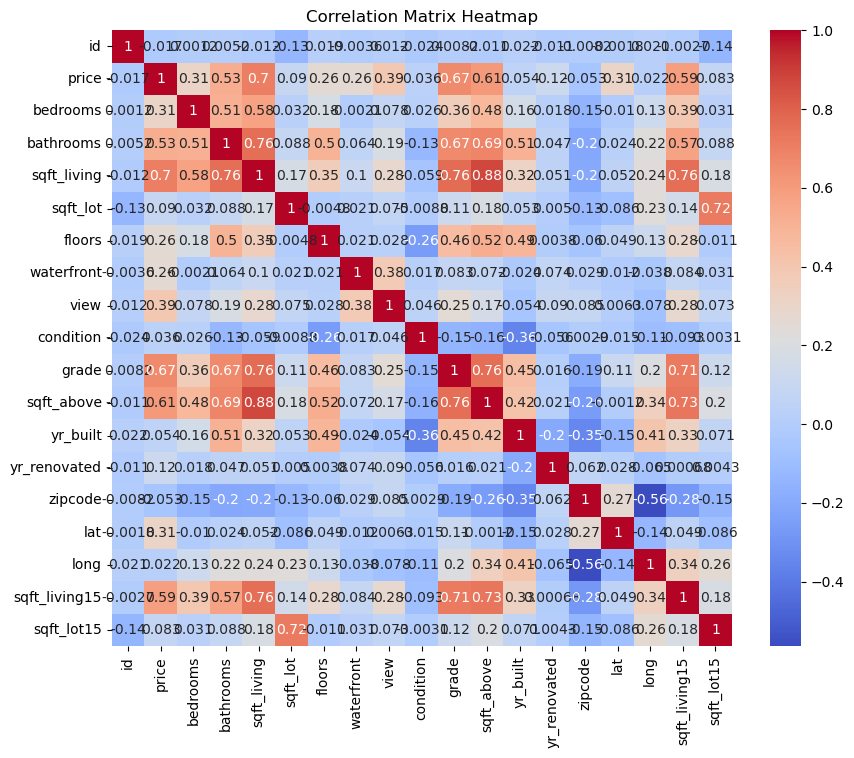

In [17]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
# select most important features
#df = df[['RM','LSTAT','PTRATIO','INDUS','MEDV']]
df = df[['bathrooms','grade','sqft_above','sqft_living','price']]

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


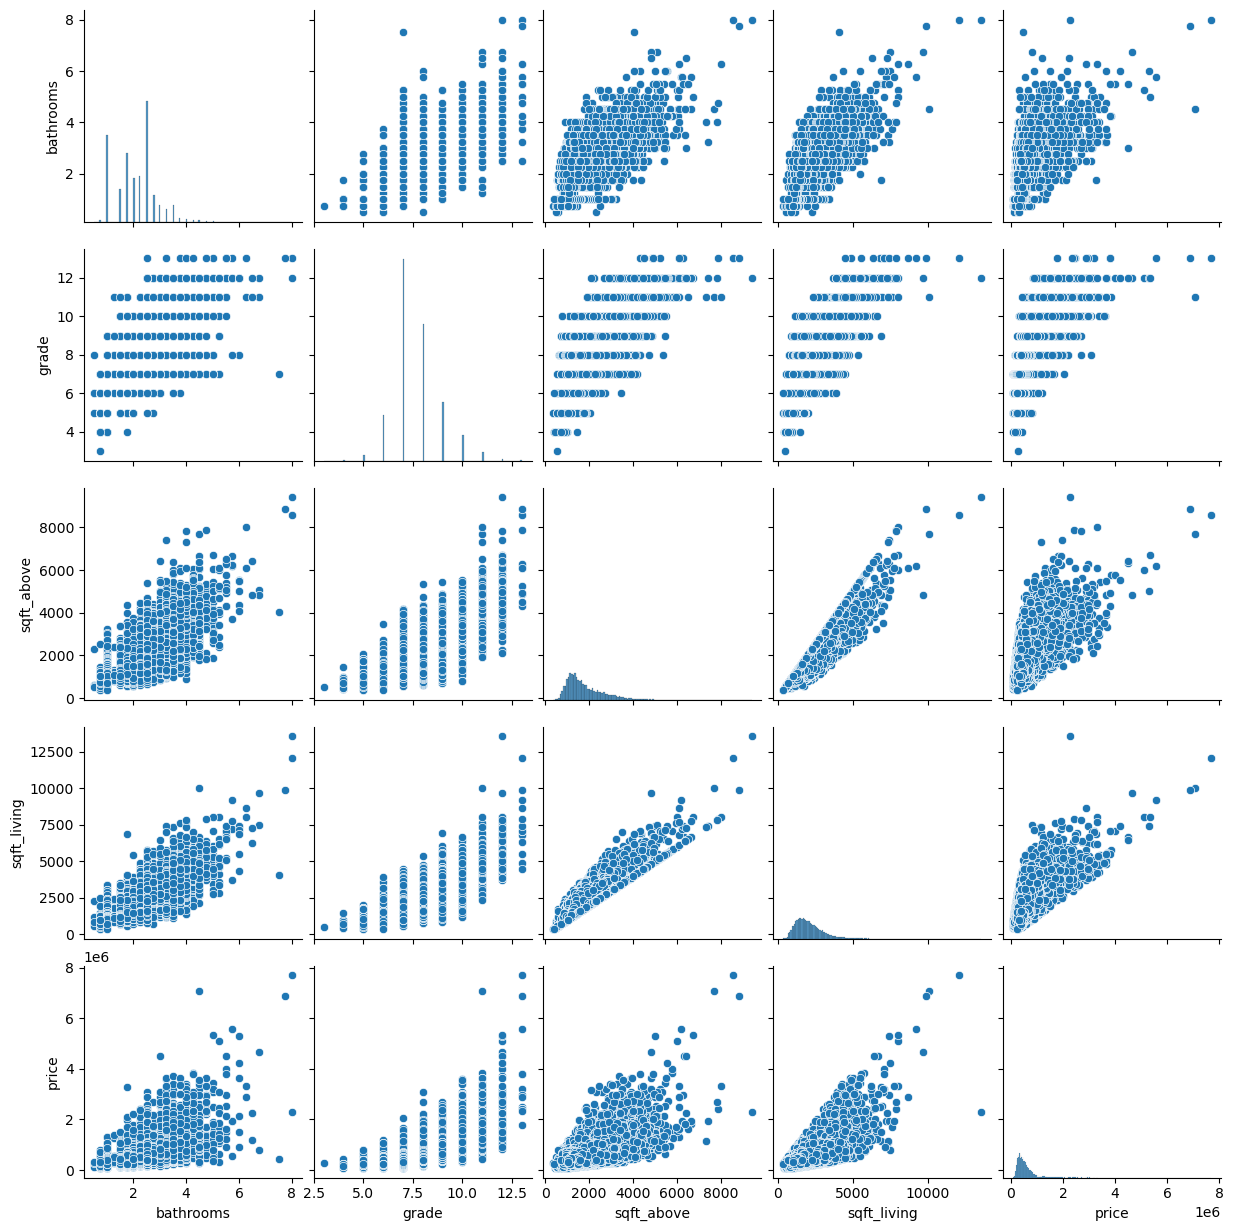

In [19]:
sns.pairplot(data=df)

In [20]:
# Drop non-numeric columns if needed, or select numeric columns explicitly
numeric_cols = df.select_dtypes(include=np.number).columns

In [21]:
# Fill missing values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1484\2566347714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [22]:
# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

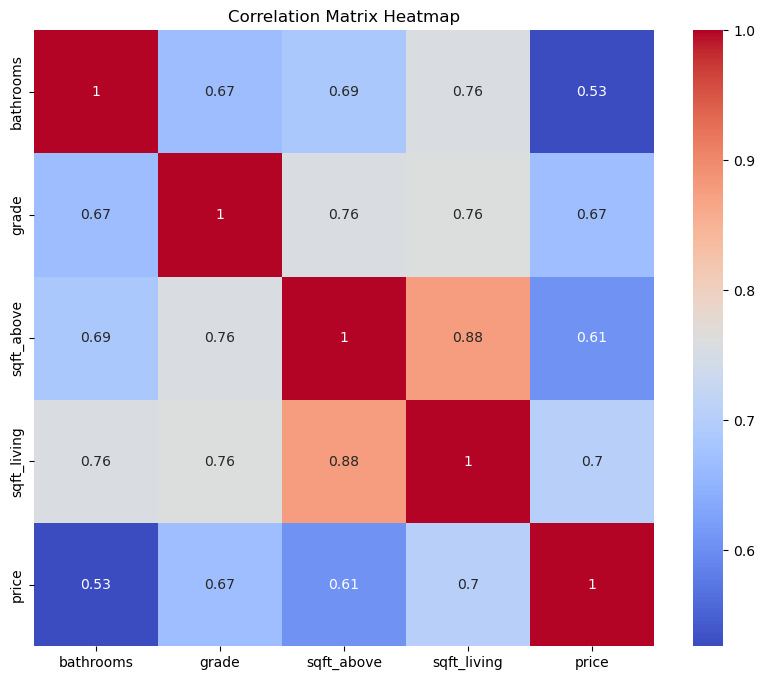

In [23]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Feature Selection

Based on the correlation coefficients with price from the King_County housing dataset, the most important features are:

sqft_living square – footage of the home
Justification: sqft_living square has a strong positive correlation with price (0.7). This indicates that as the sqft_living square increases, the price tends to increase as well.

grade – overall grade given to the housing unit, based on King County grading system
Justification: grade has a strong positive correlation with price (0.67). This indicates that the higher the house grade the higher the price or its value

bathrooms – Bathrooms Number
Justification: bathroom numbers has a strong positive correlation with price (0.53). This indicates that the higher the bathrooms number in a house the higher the price

Sqf_above – square footage of house apart from basement
Justification: Square foot above has a strong positive correlation with price (0.61). This indicates that the higher the square_foot above of a house the higher the price


## Data Cleaning

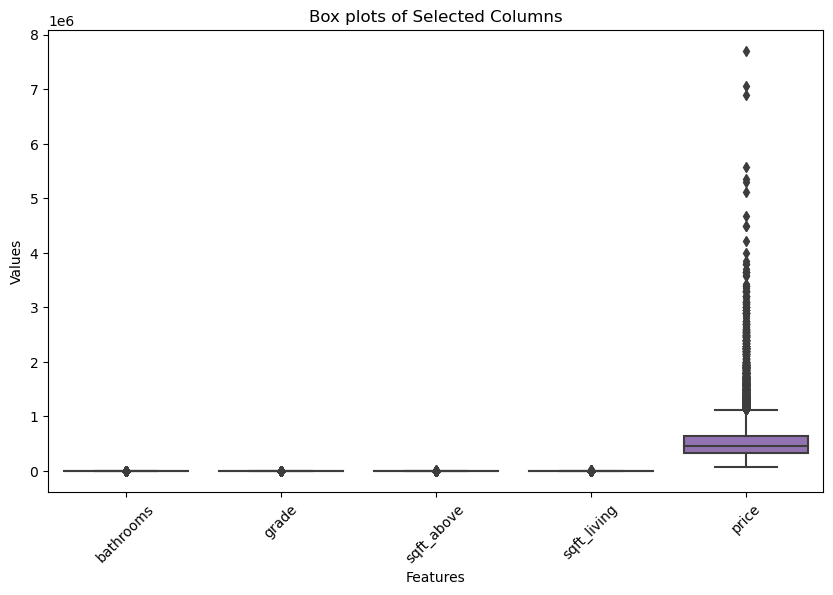

In [27]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Get the Outliers 

In [28]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

## Remove the outliers 

In [29]:
# droping all columns with outliers 
df = df.drop(outlier_indices)

## Check for Duplicates

In [30]:
df.duplicated().sum()

220

## Remove Duplicates

In [31]:
df = df.drop_duplicates()

## Recheck for Duplicates

In [32]:
df.duplicated().sum()

0

# Data analysis